# CARLOS ZULOAGA PROJECT

## Problem description.

You are a Data Scientist with the marketing team at a banking institution. The Marketing Manager has been running phone based marketing campaigns to market the new product which is a bank term deposit. The manager has historical data from marketing campaigns in the past for a similar product. Historical data is available in full.csv dataset. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

As the DS in the team, your manager wants you to build an ML based model to predict the likelihood of a customer subscribing to the term deposit. The data dictionary is below.

## Input variables:

### Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')


### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark 
purposes and should be discarded if the intention is to have a realistic predictive model.


### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')






First we're going to import our data frame and all the tools

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt
%pylab inline

df = pd.read_csv('question_dataset.csv')

df.head(10)

Populating the interactive namespace from numpy and matplotlib


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes.groupby(df.dtypes).size()

int64       5
float64     5
object     11
dtype: int64

# Exploring the data:

In [5]:
copydf = df.copy()

Any missing values?

In [6]:
copydf.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Start of by dividing the data between the categorical and numerical to help us understand our data. Excluding the duration given that our intention is to have a realistic predictive model.

In [7]:
dtypes = pd.DataFrame(copydf.dtypes.rename('type')).reset_index().astype('str')

dtypes = dtypes.query('index != "duration"')
numerical = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numerical)) & (dtypes['index'] != 'y')]['index'].values

print('Numerical:', numerical)
print('Categorical:', categorical)

Numerical: ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


## Exploring categorical data:

Lets check our value distribution for more understanding.

In [8]:
for cat in categorical:
    catdf = pd.crosstab(df[cat], df["y"])
    catdf['Total'] = catdf['no'] + catdf['yes']
    catdf['%yes'] = round(catdf['yes']/catdf['Total']*100,2)
    catdf['%no'] = 100-catdf['%yes']
    print(catdf.sort_values('%yes',ascending=False))

y                no   yes  Total   %yes    %no
job                                           
student         600   275    875  31.43  68.57
retired        1286   434   1720  25.23  74.77
unemployed      870   144   1014  14.20  85.80
admin.         9070  1352  10422  12.97  87.03
management     2596   328   2924  11.22  88.78
unknown         293    37    330  11.21  88.79
technician     6013   730   6743  10.83  89.17
self-employed  1272   149   1421  10.49  89.51
housemaid       954   106   1060  10.00  90.00
entrepreneur   1332   124   1456   8.52  91.48
services       3646   323   3969   8.14  91.86
blue-collar    8616   638   9254   6.89  93.11
y            no   yes  Total   %yes    %no
marital                                   
unknown      68    12     80  15.00  85.00
single     9948  1620  11568  14.00  86.00
divorced   4136   476   4612  10.32  89.68
married   22396  2532  24928  10.16  89.84
y                       no   yes  Total   %yes    %no
education                     

Lest plot the results

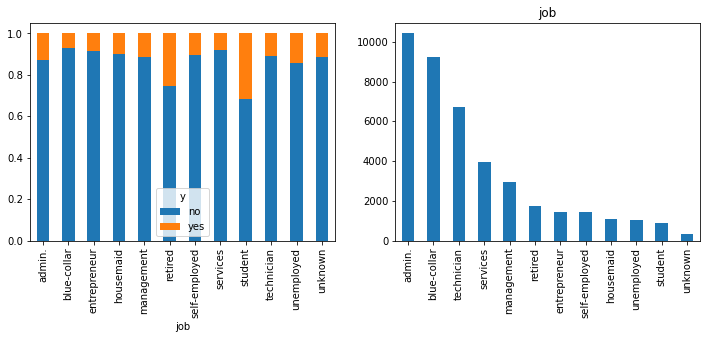

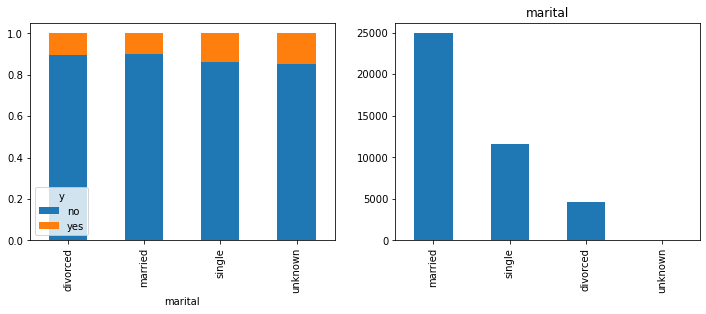

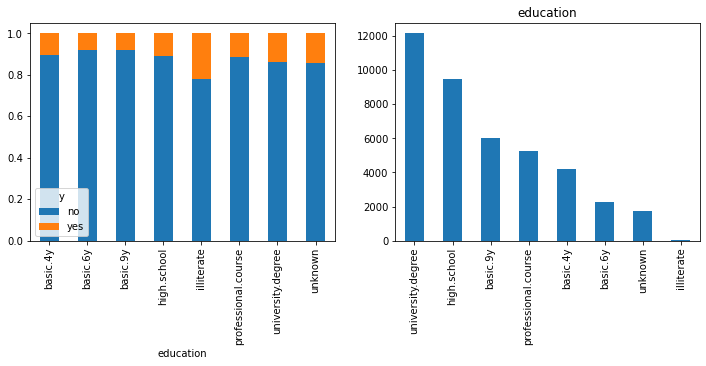

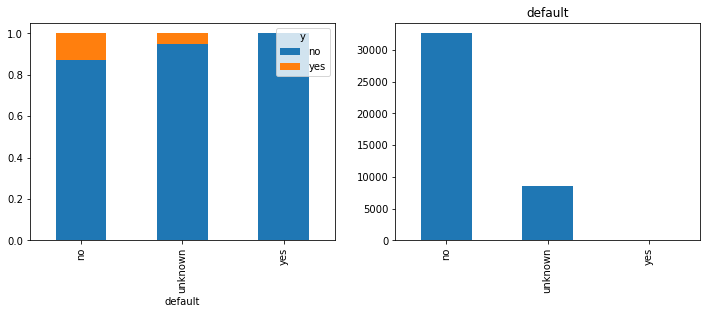

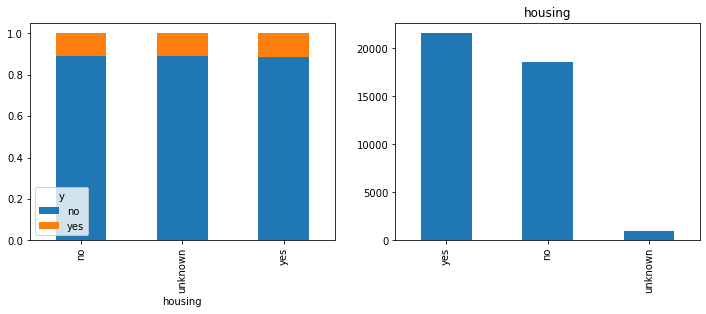

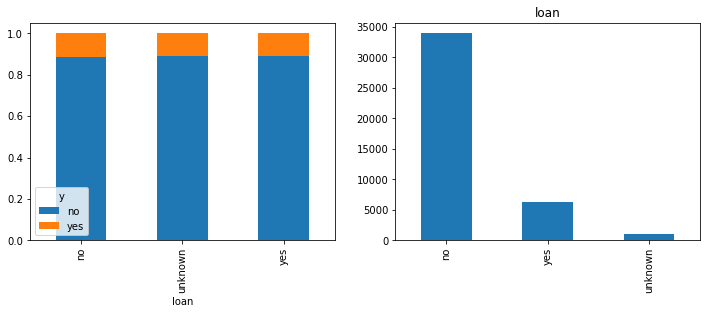

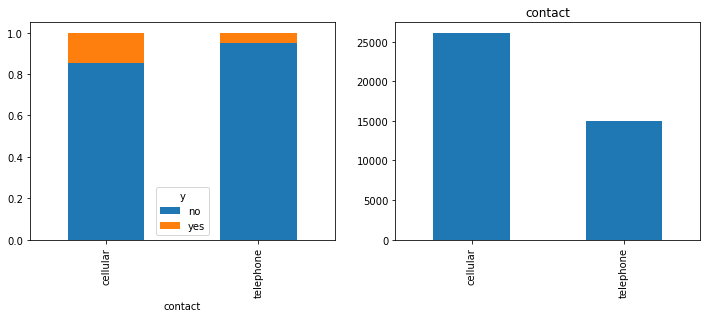

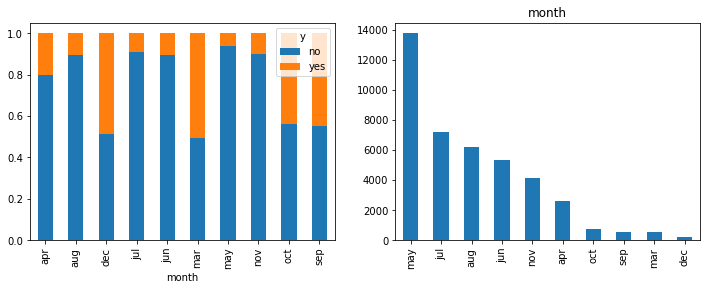

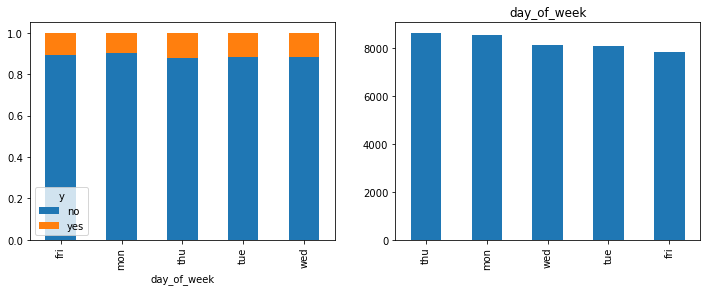

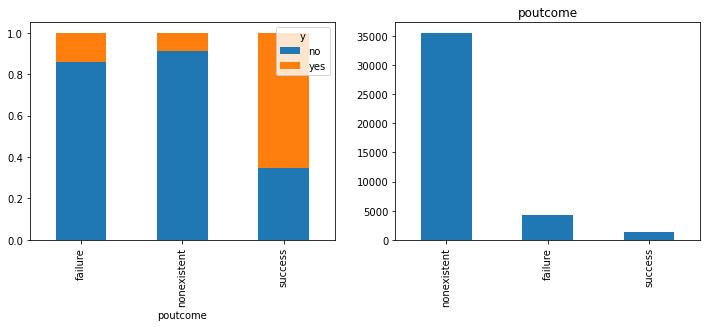

In [83]:
for cat in categorical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    count = copydf.groupby([cat, 'y']).size().rename('count').reset_index()
    outcome = count.pivot(columns='y', values='count', index=cat)
    # Plot the proportions
    outcome.div(outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
    # Plot the distribution
    copydf[cat].value_counts().plot.bar(ax=ax2, legend=False);
    plt.title(cat);

### Categorical analysis observations:
* Job: the values that have higher success rates are student, retired and unemployed, but also have low support. 
* Marital status: no significant relation the values and the outcome.
* Education: illitaret customers have a high succes rate, but they have low data to support them. 
* Default: there apperas to be a higher relationship between the value 'no' than the rest, even though there is barely any customers who has a credit default. 
* Housing loans: similar relation between customers with and without housing loans.
* Loan: fewer customers have personal loans. There is no significant relation. 
* Contact: customers that were contacted by cellphone have a 3x more predictive power than the landline. Although they were contacted nearly 2x more than the landlines. People may be more reachable on cellphones.
* Month contacted: march, december, september, and october appear to have a high predictive power, but data to support them
* Day of the week contacted: doesn't appear have significant predictive power.
* Previous outcome: customers that were contacted before are more have a high succes rate. 

There are 'nonexistent' values in several categorical attributes. They have low predictive power so we won't apply any data cleaning techniches that involve changing those values.


## Exploring numerical data:

Lets check our value distribution for more understanding.

In [84]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


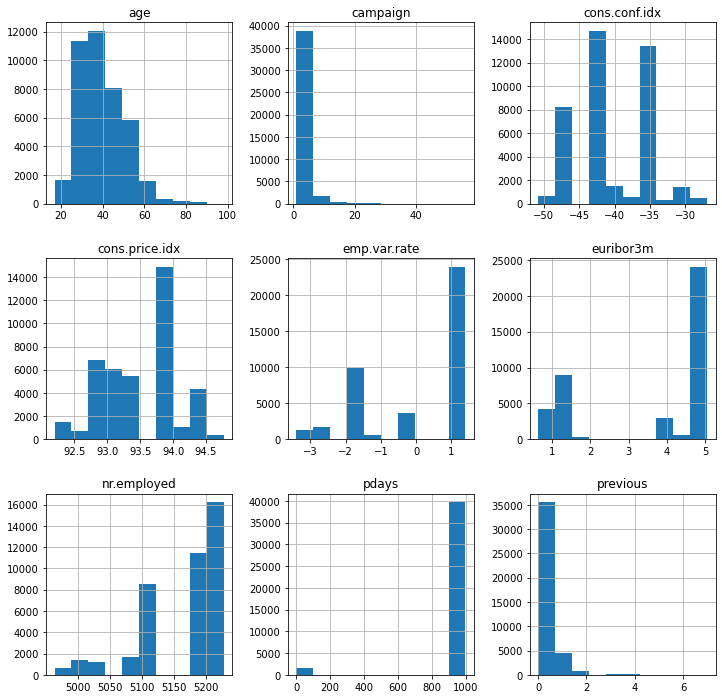

In [85]:
copydf[numerical].hist(figsize=(12,12));

Lets check the distributions of the ones that said yes to the cmpaign.


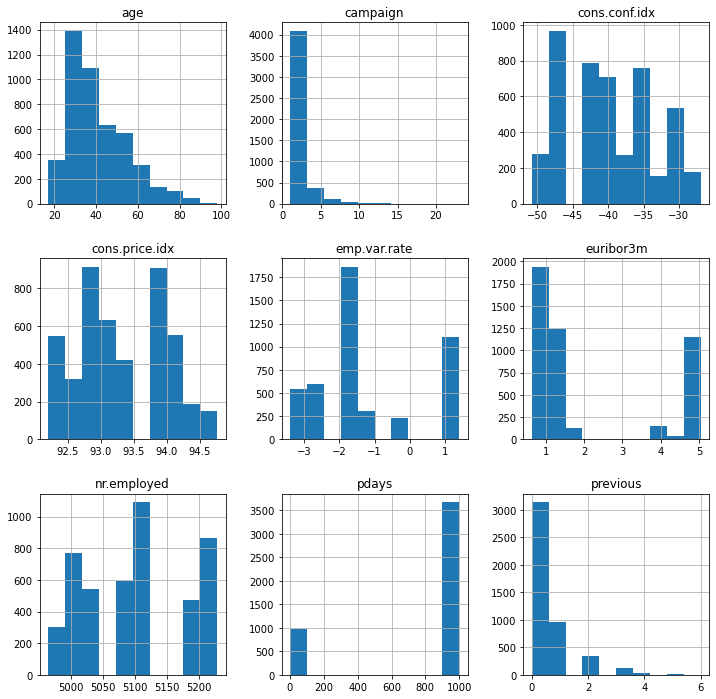

In [86]:
dfnumy=copydf[copydf['y']=='yes']
dfnumy[numerical].hist(figsize=(12,12));

The most that stands out is that the vast majority has a pdays value of 999, and that the age has a few outliers.

Lets check the succes rate for people that had a previous succesful response to the campaing and had a succesful past campaign as well.

In [87]:
gensuccess=round(len(copydf[copydf['y']=='yes'])/len(copydf)*100,2)


totalprev=len(copydf[copydf['poutcome']=='success'])
totalboth=len(copydf[(copydf['poutcome']=='success') &(copydf['y']=='yes')])
              
print('Success rate between customers who already had a successfull campaign:', round(totalboth/totalprev*100,2),'%')
print('General succes rate is:',gensuccess,'%')
print('There is',round(round(totalboth/totalprev*100,2)/gensuccess,0),'times more chance of success for a customer who had a previous successful campaign')

Success rate between customers who already had a successfull campaign: 65.11 %
General succes rate is: 11.27 %
There is 6.0 times more chance of success for a customer who had a previous successful campaign


Given the results we are going to add an indicator weather the customer was previously contacted or not before modeling.

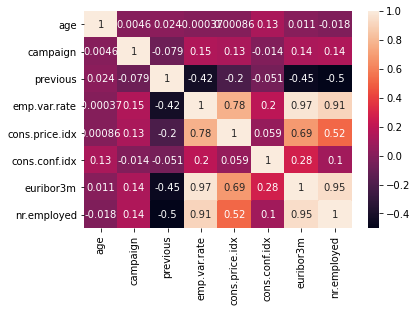

In [88]:
plt.figure()
sns.heatmap(copydf[numerical].drop('pdays',axis=1).corr(), annot=True)

Plotting the strongest correlations together:

<Figure size 432x288 with 0 Axes>

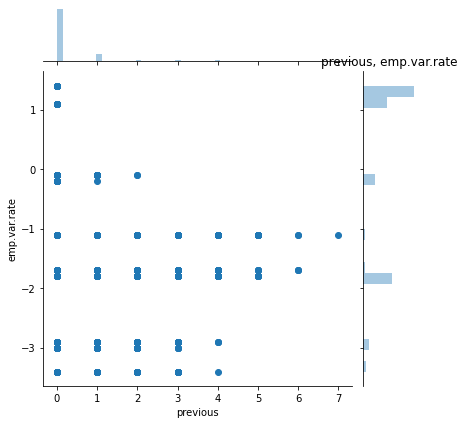

<Figure size 432x288 with 0 Axes>

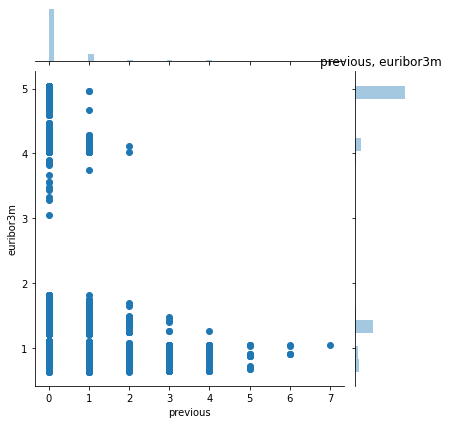

<Figure size 432x288 with 0 Axes>

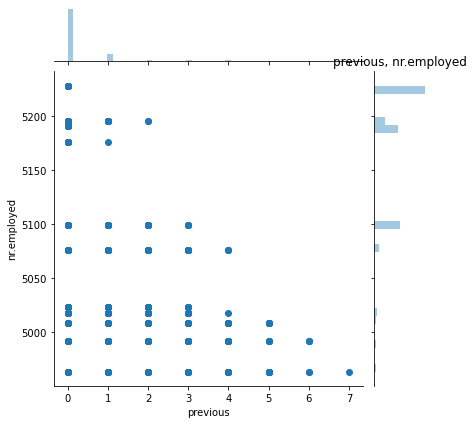

<Figure size 432x288 with 0 Axes>

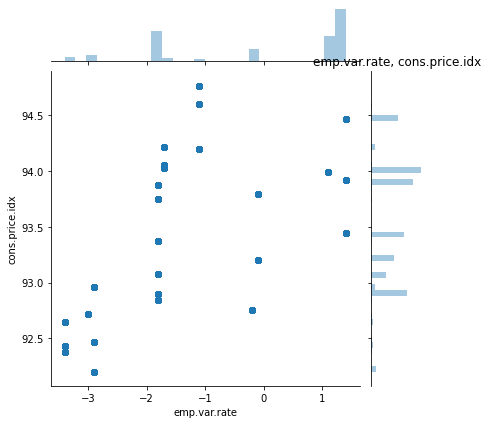

<Figure size 432x288 with 0 Axes>

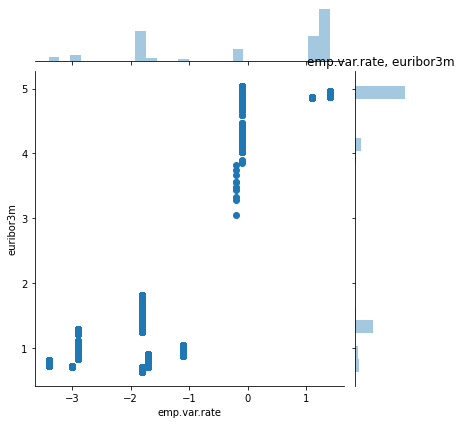

<Figure size 432x288 with 0 Axes>

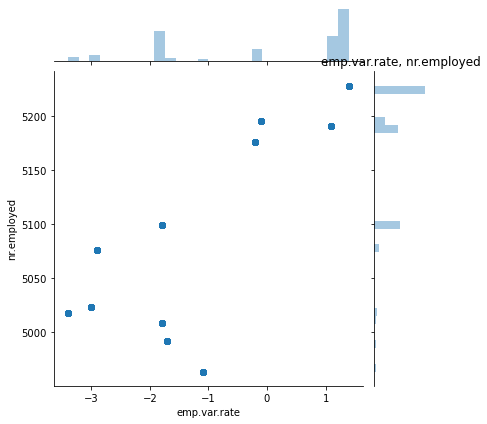

<Figure size 432x288 with 0 Axes>

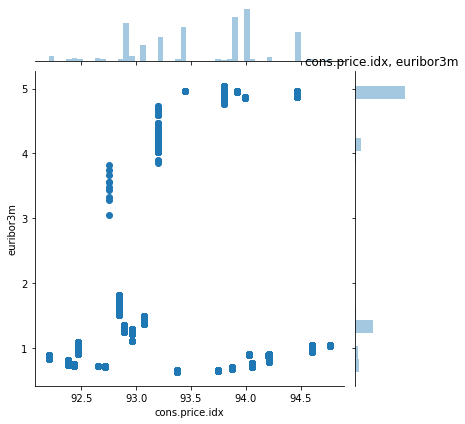

<Figure size 432x288 with 0 Axes>

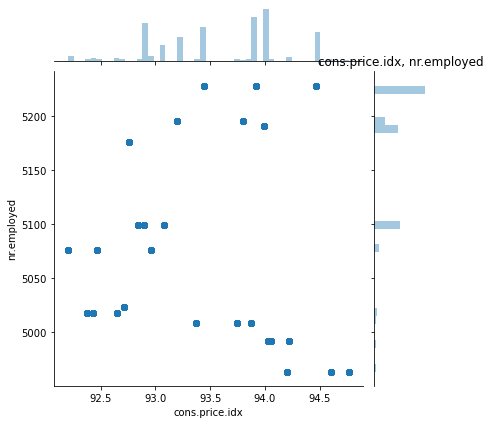

<Figure size 432x288 with 0 Axes>

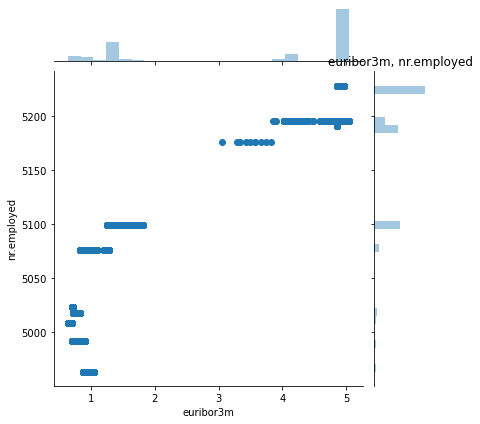

In [89]:
strong_corr=[('previous','emp.var.rate'),('previous','euribor3m'),('previous','nr.employed'),
             ('emp.var.rate', 'cons.price.idx'),('emp.var.rate', 'euribor3m'),
             ('emp.var.rate', 'nr.employed'),('cons.price.idx', 'euribor3m'),('cons.price.idx', 'nr.employed'),
             ('euribor3m', 'nr.employed')] 

for x,y in strong_corr:
    plt.figure();
    sns.jointplot(copydf[x], copydf[y]);
    plt.title('%s, %s' % (x, y));

The most significant correlations are between:
* emp.var.ratec - cons.price.idx
* emp.var.rate - euribor3m
* emp.var.rate - nr.employed
* nr.employed and euribor3m

Plot customer atributes

C:\Users\GOAT\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


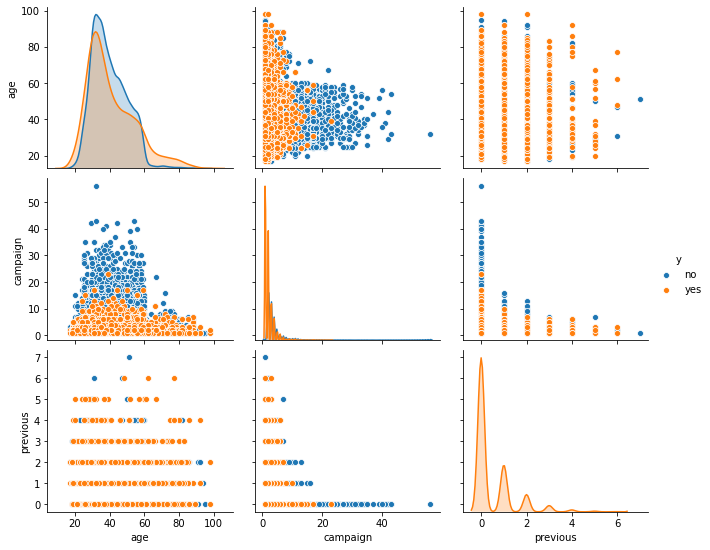

In [90]:
cust_att = ['age', 'campaign', 'previous', 'y']

num_out=pd.concat([copydf[numerical],copydf['y']],axis=1)
sns.pairplot(num_out[cust_att], hue='y',aspect=1.2);

In [91]:
copydf['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Separate into groups by campaign data for better understanding.

In [92]:
cut_labels=['1-3','4-6','7-9','10 or more']
cut_bins = [1, 3, 6, 9, 100]
copydf['campaign_group']=pd.cut(df['campaign'], bins=cut_bins, labels=cut_labels)

In [93]:
campaigndfexp = pd.crosstab(copydf['campaign_group'], copydf["y"])
campaigndfexp['Total'] = campaigndfexp['no'] + campaigndfexp['yes']
campaigndfexp['%yes'] = round(campaigndfexp['yes']/campaigndfexp['Total']*100,2)
campaigndfexp['%no'] = 100-campaigndfexp['%yes']  
campaigndfexp

y,no,yes,Total,%yes,%no
campaign_group,,,,,
1-3,14126,1785,15911,11.22,88.78
4-6,4785,444,5229,8.49,91.51
7-9,1240,72,1312,5.49,94.51
10 or more,1055,39,1094,3.56,96.44


The lower the contacts the higher the succes rate.

Separate into groups by age data for better understanding.

In [94]:
cut_labels=['15-29','30-44','45-59','60-74','75-99']
cut_bins = [15, 29, 44, 59, 74,99]
copydf['age_group']=pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

In [95]:
copydf['age_group'].head()

0    45-59
1    45-59
2    30-44
3    30-44
4    45-59
Name: age_group, dtype: category
Categories (5, object): [15-29 < 30-44 < 45-59 < 60-74 < 75-99]

In [96]:
agedfexp = pd.crosstab(copydf['age_group'], copydf["y"])
agedfexp['Total'] = agedfexp['no'] + agedfexp['yes']
agedfexp['%yes'] = round(agedfexp['yes']/agedfexp['Total']*100,2)
agedfexp['%no'] = 100-agedfexp['%yes']  
agedfexp

y,no,yes,Total,%yes,%no
age_group,,,,,
15-29,4747,922,5669,16.26,83.74
30-44,20417,2168,22585,9.60,90.40
45-59,10663,1078,11741,9.18,90.82
60-74,592,332,924,35.93,64.07
75-99,129,140,269,52.04,47.96


Younger and older customers tend to have a higher succes rate. Customers with ages higher than 60 have a very high success rate but very little data to support them. We might exclude people 60 and above for modeling.

Separate into groups by previous data for better understanding.

Plot socioeconomic variables

In [97]:
soc_ec_var=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

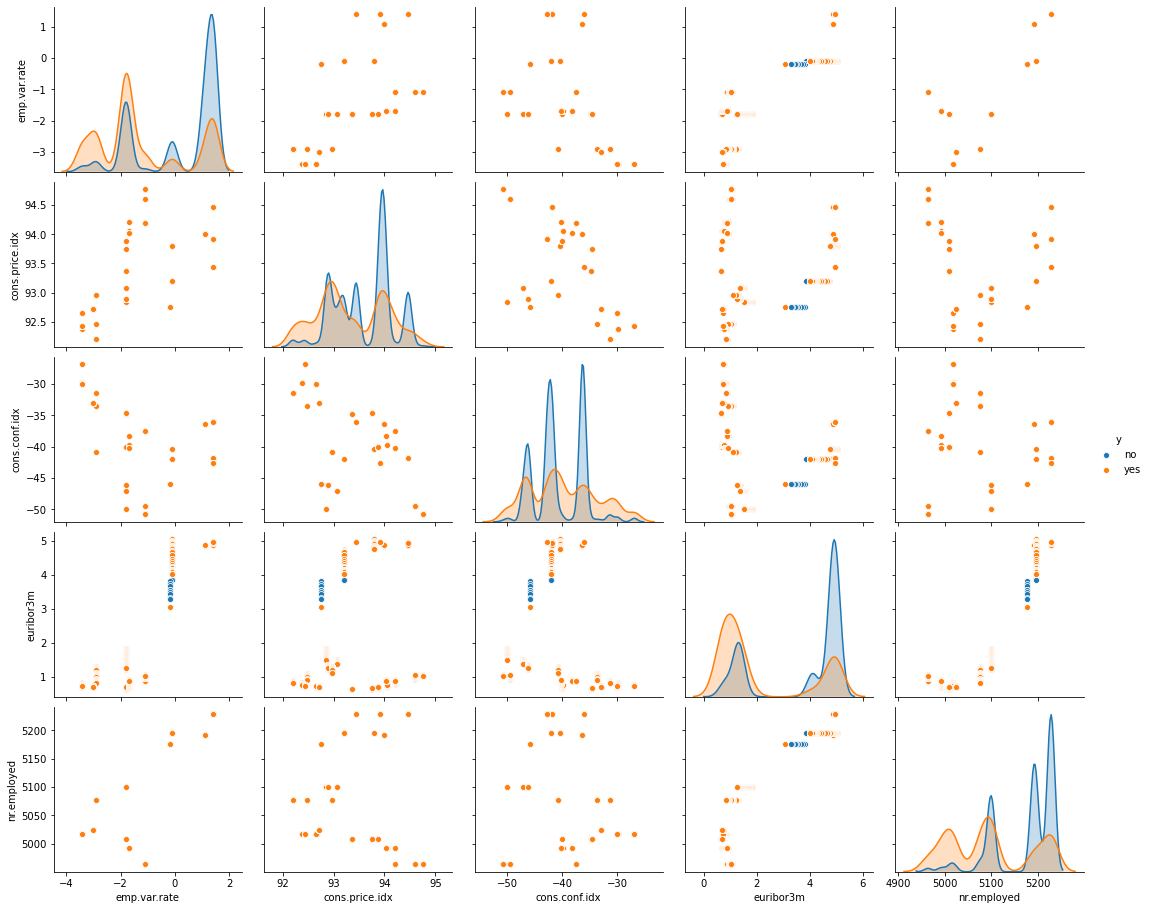

In [98]:
dfsoc_ec = pd.concat([copydf[soc_ec_var], copydf['y']], axis=1)
sns.pairplot(dfsoc_ec, hue='y', aspect=1.2);


In [99]:
print(set(dfsoc_ec.columns)-set('y'))

{'cons.conf.idx', 'cons.price.idx', 'nr.employed', 'emp.var.rate', 'euribor3m'}


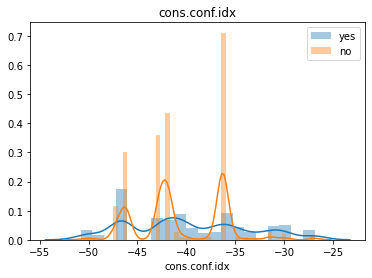

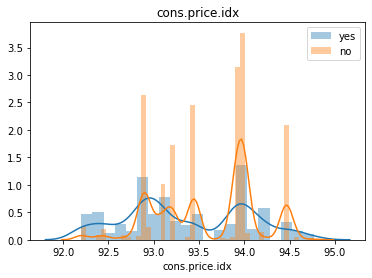

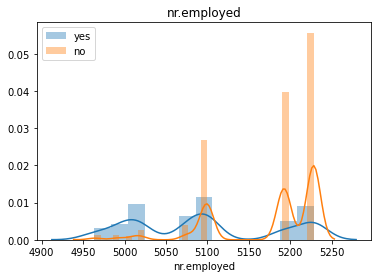

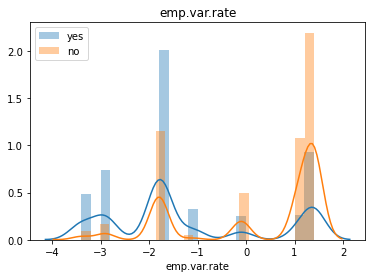

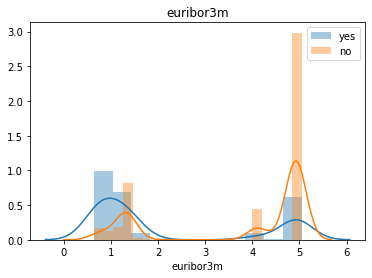

In [100]:
for var in set(dfsoc_ec.columns) - set('y'):
    plt.figure()
    sns.distplot(dfsoc_ec.loc[dfsoc_ec.y == 'yes', var], label='yes');
    sns.distplot(dfsoc_ec.loc[dfsoc_ec.y == 'no', var], label='no');
    plt.legend();
    plt.title(var);

## Socioeconomic analysis:

The responce rate varies across the ranges of values.

# Preparing the data

* Convert all categorical data with onehot encoding.
* Treat age as a categorical value (age_group) for modeling purposes.
* Treat campaign as a categorical value (campaign_group) for modeling purposes.
* Treat previous as a categorical value for modeling purposes.
* Create indicators for pdays and poutcome wether the customer was part of a previous campaign and treat them as categorical.
* Transform the y column to binary for modeling purposes.

Apply the indicators for pdays and poutcome.

In [101]:
copydf['pdays_ind']= np.where(copydf['pdays']==999,0,1)

In [102]:
copydf['poutcome_ind']= np.where(copydf['poutcome']=='nonexistent',0,1)

Create dummy variables for all categorical data

In [103]:
cat_dummies=pd.get_dummies(copydf[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']])


Our complete encoded data frame with the dummy and numerical values.

In [104]:
encodeddf_allvar=pd.concat([copydf[numerical].drop(['pdays'],axis=1),cat_dummies,copydf[['pdays_ind','poutcome_ind','y']]],axis=1)

Encode the y column

In [105]:
encodeddf_allvar['y']=np.where(encodeddf_allvar['y']=='yes',1,0)

# Modeling using all variables

We're gonna build a model using all our variables and then we're gonna use a subset of our complete dataframe to compare results. First we're going to separate our train and test data.

In [106]:
encodeddf_allvar.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
    

In [107]:
X= encodeddf_allvar.loc[:,['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pdays_ind', 'poutcome_ind']]

y=encodeddf_allvar.loc[:,'y']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=17)

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27595, 60)
(27595,)
(13593, 60)
(13593,)


### Logistic regression modeling

In [110]:
model_lg = linear_model.LogisticRegression(solver='liblinear')
model_lg.fit(X_train,y_train)
model_lg_all_score=model_lg.score(X_train,y_train)
model_lg_all_score

0.8961043667331038

In [111]:
y_actual = y_test 
y_pred =  model_lg.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_av = accuracy_score(y_actual, y_pred)
precision_lg_av = results[0]
recall_lg_av = results[1]
fscore_lg_av = results[2]

print('precision',round(precision_lg_av,4))
print('recall',round(recall_lg_av,4))
print('fscore',round(fscore_lg_av,4))
print('accuracy',round(accuracy_lg_av,4))

precision 0.7807
recall 0.5908
fscore 0.6222
accuracy 0.8965


In [112]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix
condf=pd.DataFrame(conf_matrix,index=['Predicted no','Predicted yes'],columns=['Actual no','Actual yes'])
condf

,Actual no,Actual yes
Predicted no,11884,158
Predicted yes,1249,302


In [113]:
conf_matrix_visual=X_test.copy()
conf_matrix_visual['y_act']=y_actual
conf_matrix_visual['y_tested']=y_pred
conf_matrix_visual[['y_act','y_tested']]
conf_matrix_visual['y_correct']=where(conf_matrix_visual['y_act']==conf_matrix_visual['y_tested'],1,0)
conf_matrix_visual['yes_correct']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['no_correct']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['yes_wrong']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==0),1,0)
conf_matrix_visual['no_wrong']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==0),1,0)
print('Yes guesses correct:',conf_matrix_visual['yes_correct'].sum())
print('No guesses correct:',conf_matrix_visual['no_correct'].sum())
print('Yes guesses wrong:',conf_matrix_visual['yes_wrong'].sum())
print('No guesses wrong:',conf_matrix_visual['no_wrong'].sum())
print('% yes guessed correcly:',round(conf_matrix_visual['yes_correct'].sum()/conf_matrix_visual['y_act'].sum()*100,2))

Yes guesses correct: 302
No guesses correct: 11884
Yes guesses wrong: 158
No guesses wrong: 1249
% yes guessed correcly: 19.47


### Decision tree modeling

In [114]:
from sklearn import tree

model_dt = tree.DecisionTreeClassifier(max_depth=7)
model_dt.fit(X_train,y_train)
model_dt_all_score=model_dt.score(X_train,y_train)
model_dt_all_score

0.9083167240442109

In [115]:
y_actual = y_test 
y_pred =  model_dt.predict(X_test)

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_dt_av = accuracy_score(y_actual, y_pred)

precision_dt_av = results[0]
recall_dt_av = results[1]
fscore_dt_av = results[2]

print('precision',round(precision_dt_av,4))
print('recall',round(recall_dt_av,4))
print('fscore',round(fscore_dt_av,4))
print('accuracy',round(accuracy_dt_av,4))

precision 0.7778
recall 0.6121
fscore 0.648
accuracy 0.8983


In [116]:
conf_matrix_visual=X_test.copy()
conf_matrix_visual['y_act']=y_actual
conf_matrix_visual['y_tested']=y_pred
conf_matrix_visual[['y_act','y_tested']]
conf_matrix_visual['y_correct']=where(conf_matrix_visual['y_act']==conf_matrix_visual['y_tested'],1,0)
conf_matrix_visual['yes_correct']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['no_correct']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['yes_wrong']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==0),1,0)
conf_matrix_visual['no_wrong']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==0),1,0)
print('Yes guesses correct:',conf_matrix_visual['yes_correct'].sum())
print('No guesses correct:',conf_matrix_visual['no_correct'].sum())
print('Yes guesses wrong:',conf_matrix_visual['yes_wrong'].sum())
print('No guesses wrong:',conf_matrix_visual['no_wrong'].sum())
print('% yes guessed correcly:',round(conf_matrix_visual['yes_correct'].sum()/conf_matrix_visual['y_act'].sum()*100,2))

Yes guesses correct: 374
No guesses correct: 11837
Yes guesses wrong: 205
No guesses wrong: 1177
% yes guessed correcly: 24.11


In [117]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix
condf=pd.DataFrame(conf_matrix,index=['Predicted no','Predicted yes'],columns=['Actual no','Actual yes'])
condf


,Actual no,Actual yes
Predicted no,11837,205
Predicted yes,1177,374


# Modeling using chosen subset


We're oing to remove the day_of_week, and month guven that they have no significant relationship with the output. We are also going to filter out the ones that have 'student' as job, people over 60, and education as illiterate given that they have low supprt and high impact on the outcome.

In [118]:
encodeddf_allvar.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
    

In [119]:
drop_columns=['day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu','day_of_week_tue', 'day_of_week_wed',
              'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun','month_mar', 'month_may',
              'month_nov', 'month_oct', 'month_sep','job_student']
modified_sub = encodeddf_allvar.copy().drop(drop_columns,axis=1)
modified_sub.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'pdays_ind', 'poutcome_ind', 'y'],
      dtype='object')

In [120]:
X= modified_sub.loc[:,['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'pdays_ind', 'poutcome_ind']]

y= modified_sub.loc[:,'y']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27595, 44)
(27595,)
(13593, 44)
(13593,)


### Logistic regression modeling using subset

In [122]:
model_lg = linear_model.LogisticRegression(solver='liblinear')
model_lg.fit(X_train,y_train)
model_lg_sub_score=model_lg.score(X_train,y_train)
model_lg_sub_score

0.8971915202029354

In [123]:
y_actual = y_test 
y_pred =  model_lg.predict(X_test)

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_sub = accuracy_score(y_actual, y_pred)

precision_lg_sub = results[0]
recall_lg_sub = results[1]
fscore_lg_sub = results[2]

print('precision',round(precision_lg_sub,4))
print('recall',round(recall_lg_sub,4))
print('fscore',round(fscore_lg_sub,4))
print('accuracy',round(accuracy_lg_sub,4))

precision 0.7763
recall 0.6033
fscore 0.6376
accuracy 0.8973


In [124]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix
condf=pd.DataFrame(conf_matrix,index=['Predicted no','Predicted yes'],columns=['Actual no','Actual yes'])
condf

,Actual no,Actual yes
Predicted no,11852,190
Predicted yes,1206,345


In [125]:
conf_matrix_visual=X_test.copy()
conf_matrix_visual['y_act']=y_actual
conf_matrix_visual['y_tested']=y_pred
conf_matrix_visual[['y_act','y_tested']]
conf_matrix_visual['y_correct']=where(conf_matrix_visual['y_act']==conf_matrix_visual['y_tested'],1,0)
conf_matrix_visual['yes_correct']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['no_correct']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['yes_wrong']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==0),1,0)
conf_matrix_visual['no_wrong']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==0),1,0)
print('Yes guesses correct:',conf_matrix_visual['yes_correct'].sum())
print('No guesses correct:',conf_matrix_visual['no_correct'].sum())
print('Yes guesses wrong:',conf_matrix_visual['yes_wrong'].sum())
print('No guesses wrong:',conf_matrix_visual['no_wrong'].sum())
print('% yes guessed correcly:',round(conf_matrix_visual['yes_correct'].sum()/conf_matrix_visual['y_act'].sum()*100,2))

Yes guesses correct: 345
No guesses correct: 11852
Yes guesses wrong: 190
No guesses wrong: 1206
% yes guessed correcly: 22.24


### Decision tree modeling using subset


In [126]:
model_dt = tree.DecisionTreeClassifier(max_depth=6)
model_dt.fit(X_train,y_train)
model_dt_sub_score=model_dt.score(X_train,y_train)
model_dt_sub_score

0.9047653560427613

In [127]:
y_actual = y_test 
y_pred =  model_dt.predict(X_test)


results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_dt_sub = accuracy_score(y_actual, y_pred)

precision_dt_sub = results[0]
recall_dt_sub = results[1]
fscore_dt_sub = results[2]

print('precision',round(precision_dt_sub,4))
print('recall',round(recall_dt_sub,4))
print('fscore',round(fscore_dt_sub,4))
print('accuracy',round(accuracy_dt_sub,4))

precision 0.7727
recall 0.6259
fscore 0.6627
accuracy 0.8989


In [128]:
conf_matrix_visual=X_test.copy()
conf_matrix_visual['y_act']=y_actual
conf_matrix_visual['y_tested']=y_pred
conf_matrix_visual[['y_act','y_tested']]
conf_matrix_visual['y_correct']=where(conf_matrix_visual['y_act']==conf_matrix_visual['y_tested'],1,0)
conf_matrix_visual['yes_correct']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['no_correct']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==1),1,0)
conf_matrix_visual['yes_wrong']=where((conf_matrix_visual['y_tested']==1)&(conf_matrix_visual['y_correct']==0),1,0)
conf_matrix_visual['no_wrong']=where((conf_matrix_visual['y_tested']==0)&(conf_matrix_visual['y_correct']==0),1,0)
print('Yes guesses correct:',conf_matrix_visual['yes_correct'].sum())
print('No guesses correct:',conf_matrix_visual['no_correct'].sum())
print('Yes guesses wrong:',conf_matrix_visual['yes_wrong'].sum())
print('No guesses wrong:',conf_matrix_visual['no_wrong'].sum())
print('% yes guessed correcly:',round(conf_matrix_visual['yes_correct'].sum()/conf_matrix_visual['y_act'].sum()*100,2))

Yes guesses correct: 422
No guesses correct: 11797
Yes guesses wrong: 245
No guesses wrong: 1129
% yes guessed correcly: 27.21


In [129]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix
condf=pd.DataFrame(conf_matrix,index=['Predicted no','Predicted yes'],columns=['Actual no','Actual yes'])
condf

,Actual no,Actual yes
Predicted no,11797,245
Predicted yes,1129,422


In [130]:
models=['Logistic Regression All Var','Decision Tree All Var','Logistic Regression Subset','Decision Tree Subset']
target = ['y','y','y','y']

ind_variables = ['all','all','subset','subset']

model_type = ['logistic regresion','Decision Tree','logistic regresion','Decision Tree']
accuracy = [accuracy_lg_av, accuracy_dt_av, accuracy_lg_sub, accuracy_dt_sub]
precision = [precision_lg_av, precision_dt_av, precision_lg_sub, precision_dt_sub]
recall = [recall_lg_av, recall_dt_av, recall_lg_sub, recall_dt_sub]
fscore=[fscore_lg_av, fscore_dt_av, fscore_lg_sub, fscore_dt_sub]
model_score=[model_lg_all_score,model_dt_all_score,model_lg_sub_score,model_dt_sub_score]



results = pd.DataFrame()
columns = ['Model','Target Variable','Independant Variables','Model Type','Model Score','Accuracy','Precision',
           'Recall','F score']


    
results['Model'] = models    
results['Target Variable'] = target
results['Independant Variables'] = ind_variables
results['Model Type'] = model_type
results['Model Score'] = model_score
results['Accuracy'] = accuracy
results['Precision'] = precision
results['Recall'] = recall
results['F score'] = fscore

results.sort_values('Recall',ascending=False)

,Model,Target Variable,Independant Variables,Model Type,Model Score,Accuracy,Precision,Recall,F score
3,Decision Tree Subset,y,subset,Decision Tree,0.904765,0.898919,0.772670,0.625869,0.662746
1,Decision Tree All Var,y,all,Decision Tree,0.908317,0.898330,0.777750,0.612056,0.648009
2,Logistic Regression Subset,y,subset,logistic regresion,0.897192,0.897300,0.776251,0.603330,0.637580
0,Logistic Regression All Var,y,all,logistic regresion,0.896104,0.896491,0.780709,0.590796,0.622230


# Conclusion

First off we can see there is no sign of overfitting in any of our models.

For this particular case we can conclude that the model which performed better is the Decision Tree model while using the subset we chose above. It scores considerably better on Recall, which indicates a better rate of correctly identifying the true positives. Although it gets scores a slightly less on precision when compared to the Logistic Regresion with all variables, it also scores slightly higher on accuracy which is better on this case.

While we were able to improve our Decision Tree model, the Logistic Regression model scored slightly worse while using the subset data.

# Evaluation

For the evaluation purposes we are going to use only the row whech where predicted yes of our confusion matrix. We are going to check if we could find a better conversion rate.

In [131]:
rate_random=encodeddf_allvar['y'].sum()/len(encodeddf_allvar)
print('The rate of conversion using a random policy is: ',round(rate_random*100,2),'%')

The rate of conversion using a random policy is:  11.27 %


In [132]:
rate_dt_model=condf['Actual yes'][1]/(condf['Actual yes'][1]+condf['Actual no'][1])
print('The rate of conversion using a the decision tree model we selected is: ',round(rate_dt_model*100,2),'%')
print('Using a the decision tree model we selected, we can preddict',round(rate_dt_model/rate_random,1),'times better than using a random policy.')

The rate of conversion using a the decision tree model we selected is:  27.21 %
Using a the decision tree model we selected, we can preddict 2.4 times better than using a random policy.


Using our Decision Tree based model for predicting possible customers we can double the conversion rate and most likely double the profit for each campaign. 